In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
from tqdm import tqdm
from sklearn.neighbors import NearestNeighbors
import numpy as np
import random
import pickle 
import matplotlib.pyplot as plt




In [13]:
df = pd.read_csv('../cleaned_data/reviews_matched.csv')

#print out some info about the data
print(df.shape)
df = df.drop_duplicates()
print(df.shape)
# Print the entire DataFrame
print(df)

duplicate_count = df['Title'].duplicated().sum()
# print("Number of books with at least two people rating it:", duplicate_count)
duplicate_counts_per_value = df['Title'].value_counts()
print(duplicate_counts_per_value)
titles = list(df['Title'].unique())
num_titles = len(titles)
print("Number of unique books: ", num_titles)
user_ids = list(df['User_id'].unique())
num_users = len(user_ids)
print("number of users is: ", num_users)
# print("user_ids = ", user_ids)


(61561, 15)
(61561, 15)
       Unnamed: 0                   Title            Author          Rating  \
0             181               bloodline     james rollins  Invalid rating   
1             199               nocturnal      scott sigler  Invalid rating   
2             202               nocturnal      scott sigler  Invalid rating   
3             203                pandemic      scott sigler  Invalid rating   
4             343       a river enchanted      rebecca ross               4   
...           ...                     ...               ...             ...   
61556      348453  a discovery of witches  deborah harkness               5   
61557      348464              yes please       amy poehler               5   
61558      348465             i am malala  malala yousafzai               5   
61559      348466              bossypants          tina fey               5   
61560      348476    steal like an artist      austin kleon               4   

         User_id        isb

In [14]:
#Number of reviews per title
print("Num reviews, title")
for index, value in duplicate_counts_per_value.iteritems():
        print(value, index)



Num reviews, title
739 the fault in our stars
639 it ends with us
561 verity
553 catching fire
542 divergent
539 the seven husbands of evelyn hugo
522 a court of thorns and roses
471 where the crawdads sing
425 fourth wing
420 the girl on the train
418 the silent patient
393 a court of mist and fury
387 gone girl
355 the help
353 fifty shades of grey
349 a court of wings and ruin
336 the housemaid
317 it starts with us
314 the midnight library
311 ugly love
302 heartstopper
297 throne of glass
294 a court of frost and starlight
274 daisy jones & the six
250 normal people
248 reminders of him
244 educated
242 the selection
241 the guest list
236 a ​court of silver flames
229 lessons in chemistry
224 crown of midnight
223 a good girl's guide to murder
219 the nightingale
212 little fires everywhere
211 me before you
206 insurgent
204 heir of fire
202 book lovers
201 people we meet on vacation
200 all the light we cannot see
197 happy place
194 beach read
187 the love hypothesis
187 the i

/tmp/ipykernel_910/134545694.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in duplicate_counts_per_value.iteritems():


43 without merit
43 a curse for true love
42 the institute
42 shoe dog
42 the covenant of water
42 losing hope
42 the paradise problem
42 all good people here
42 the bullet that missed
41 the ex hex
41 talking to strangers
41 night road
41 the wife upstairs
41 assistant to the villain
41 the war of two queens
40 the 7 1/2 deaths of evelyn hardcastle
40 the nickel boys
40 oathbringer
40 all systems red
40 the fifth season
40 beneath a scarlet sky
40 final offer
40 i'll be gone in the dark
40 the sun is also a star
39 girl, woman, other
39 tender is the flesh
39 leather & lark
39 legends & lattes
39 annihilation
39 the five-star weekend
39 pineapple street
39 home is where the bodies are
39 city of girls
39 i'll give you the sun
39 the casual vacancy
39 five feet apart
38 lean in
38 the last devil to die
38 mr. mercedes
38 recursion
38 my sister, the serial killer
38 all the colors of the dark
38 the raven boys
38 one last stop
37 all the missing girls
37 the turn of the key
37 and the m

13 foxglove
13 my best friend's exorcism
13 permanent record
13 the tuscan child
13 essentialism
13 the paris daughter
13 the innocent
13 tell the wolves i'm home
13 the wonder
13 act your age, eve brown
13 the rise of nine
13 blue lily, lily blue
13 the sentence
13 bad feminist
13 him
13 the beautiful mystery
13 the long game
12 a curse so dark and lonely
12 the silent wife
12 fire & blood
12 tiamat's wrath
12 smokin' seventeen
12 dad is fat
12 caleb's crossing
12 the third gilmore girl
12 rising strong
12 starter villain
12 the undoing project
12 the broken girls
12 a grimm warning
12 dead reckoning
12 the fountains of silence
12 the girl in the tower
12 the royal we
12 cruel beauty
12 the pull of the stars
12 oh william!
12 #girlboss
12 a fire in the flesh
12 if it bleeds
12 the wind through the keyhole
12 of women and salt
12 a better man
12 the last mile
12 the kept woman
12 the maid's diary
12 the pioneer woman cooks
12 red at the bone
12 when no one is watching
12 the kiss thief

6 the five
6 demonglass
6 front desk
6 the hollow places
6 the devil and the dark water
6 nutshell
6 lovecraft country
6 party of two
6 wishtree
6 the final revival of opal & nev
6 perfect
6 hood feminism
6 lexicon
6 killing kennedy
6 never let you go
6 you should see me in a crown
6 someone who will love you in all your damaged glory
6 slade house
6 thrawn
6 egomaniac
6 the stardust thief
6 just one day
6 the buried giant
6 shattered
6 all the little lights
6 honey girl
6 the twisted ones
6 hunted
6 a promise of fire
6 another brooklyn
6 out of the easy
6 cemetery boys
6 a reaper at the gates
6 waking up
6 11th hour
6 fangs
6 boomerang
6 embassytown
6 these broken stars
6 a love song for ricki wilde
6 seduced in the dark
6 the gravity of us
6 rage
6 feel-good productivity
6 when
6 kitchens of the great midwest
6 coming clean
6 age of myth
6 concrete rose
6 from sand and ash
6 bloodmarked
6 we are water
6 light
6 violet bent backwards over the grass
6 red notice
6 star wars
6 a hundred

4 the pioneers
4 lothaire
4 shadows in flight
4 the summer children
4 yes, chef
4 mom & me & mom
4 magic breaks
4 fortunately, the milk
4 lost in time
4 demon in the wood
4 mister magic
4 you could make this place beautiful
4 if you could see the sun
4 when they call you a terrorist
4 what if? 2
4 the good egg
4 forensics
4 clanlands
4 the reformatory
4 daytripper
4 symptoms of being human
4 silver nitrate
4 a very large expanse of sea
4 the astronaut wives club
4 night broken
4 sundial
4 the jasmine throne
4 magic shifts
4 magic binds
4 river marked
4 the witch doesn't burn in this one
4 aurora
4 the passage of power
4 deathless
4 the greater journey
4 the midwife's confession
4 robopocalypse
4 stellarlune
4 the last council
4 home
4 the space between worlds
4 foundryside
4 the land
4 phantom
4 furia
4 come sundown
4 becoming steve jobs
4 when we collided
4 the billion dollar spy
4 opposite of always
4 dead eleven
4 my dog
4 frost burned
4 what we lose
4 the female of the species
4 ju

2 influx
2 helium
2 traitor to the throne
2 you deserve a drink
2 take me with you
2 cross my heart
2 rough sleepers
2 the future of humanity
2 age of empyre
2 the world until yesterday
2 america's first daughter
2 comfort me with apples
2 brotherhood in death
2 the two-family house
2 beautiful things
2 head on
2 the divide
2 this changes everything
2 claire dewitt and the city of the dead
2 habibi
2 the case against sugar
2 before jamaica lane
2 age of legend
2 gathering prey
2 waterfall
2 zero fail
2 the lincoln conspiracy
2 it starts with food
2 billy lynn's long halftime walk
2 uncanny valley
2 little princes
2 in a different key
2 daughters of shandong
2 killing crazy horse
2 america again
2 everything here is beautiful
2 the wild rose
2 the violence
2 townie
2 black sheep
2 the unwritten, vol. 3
2 the day the crayons came home
2 code zero
2 the wicked + the divine, vol. 6
2 the wicked + the divine, vol. 5
2 the wicked + the divine, vol. 3
2 the wicked + the divine, vol. 2
2 mouth

1 hot head
1 city of miracles
1 city of blades
1 double cross
1 suddenly a murder
1 break your glass slippers
1 the ghost tree
1 smoke gets in your eyes
1 warrior girl unearthed
1 shadow heir
1 the traitor queen
1 white horse
1 apocalypse never
1 time travel
1 unfiltered
1 black girl, call home
1 angles of attack
1 the fold
1 we deserve monuments
1 dark one
1 god-level knowledge darts
1 senlin ascends
1 messy roots
1 the last watch
1 extinction horizon
1 letters to the lost
1 the dead of night
1 the midnight assassin
1 american fire
1 toph beifong's metalbending academy
1 hacking darwin
1 thrive
1 hollow world
1 eat slay love
1 jeni's splendid ice creams at home
1 leonard
1 there's always this year
1 sex criminals, vol. 1
1 saint odd
1 the dark enquiry
1 scary close
1 the man who could move clouds
1 bread and wine
1 nejma
1 the truth about magic
1 love, hate & other filters
1 one nation
1 call me irresistible
1 i'm judging you
1 10-day green smoothie cleanse
1 malcolm x
1 traitor's bla

1 when the moon is low
1 the curse of tenth grave
1 the perfect son
1 5 very good reasons to punch a dolphin in the mouth and other useful guides
1 primitives
1 i am every good thing
1 the bright lands
1 feminasty
1 crying in the bathroom
1 beacon 23
1 i see life through rosé-colored glasses
1 bring me your midnight
1 smitten kitchen every day
1 the crossroads of should and must
1 bury your gays
1 empty bottles full of stories
1 knife
1 hell followed with us
1 a god in the shed
1 be prepared
1 the rules do not apply
1 the chronology of water
1 delancey
1 liesl & po
1 october mourning
1 navel gazing
1 julián is a mermaid
1 wards of faerie
1 into the magic shop
1 return of the thief
1 the hero's guide to saving your kingdom
1 i want my hat back
1 scaredy squirrel has a birthday party
1 wade in the water
1 14
1 a sunny place for shady people
1 this cursed house
1 the adventure zone vol. 3
1 the emerald atlas
1 overwhelmed
1 insane city
1 the vision, vol. 2
1 the vision, vol. 1
1 duckling 

In [16]:
# Convert 'rating' to numeric, forcing invalid values to NaN
df["Rating"] = pd.to_numeric(df["Rating"], errors="coerce")

# Remove rows where 'rating' is NaN
df = df.dropna(subset=["Rating"]).reset_index(drop=True)

# Group by title to find count and average rating
result = df.groupby("Title").agg(
    count=("Title", "size"),
    avg_rating=("Rating", "mean")
).reset_index()


In [17]:
# Make an array with columns as users and rows as books
ratings = np.zeros((num_users, num_titles))

for index, row in df.iterrows():
    if row['Title'] in titles:
        try:
            ratings[user_ids.index(row['User_id']), titles.index(row["Title"])] = int(row["Rating"])
        except:
            pass
        
print("ratings size = ", ratings.shape)
#remove users where all lines are 0s. 
ratings = ratings[~np.all(ratings == 0, axis=1)]
print("ratings size = ", ratings.shape)

df.to_csv("../cleaned_data/ratings_user_v_book.csv", index=False)



ratings size =  (5043, 3782)
ratings size =  (4515, 3782)


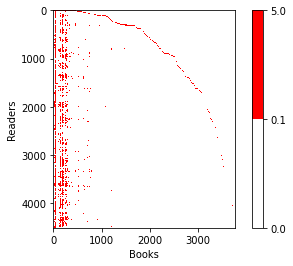

In [20]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Create a custom colormap with white, yellow, and red
cmap = mcolors.ListedColormap(['white', 'red'])
bounds = [0, 0.1, 5]  # Define ranges: 0 (white), 0.1-0.5 (yellow), 0.5-1 (red)
norm = mcolors.BoundaryNorm(bounds, len(cmap.colors))

plt.imshow(ratings, cmap=cmap, norm=norm)
plt.colorbar()
plt.xlabel("Books")
plt.ylabel("Readers")
plt.show()


Text(0, 0.5, 'Number of books')

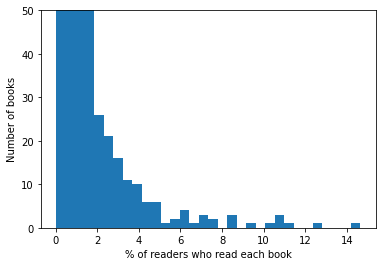

In [21]:
plt.hist(duplicate_counts_per_value/num_users*100, bins = 32)
plt.ylim([0,50])
plt.xlabel('% of readers who read each book')
plt.ylabel("Number of books")
# print(duplicate_counts_per_value)

Text(0, 0.5, 'Number of users')

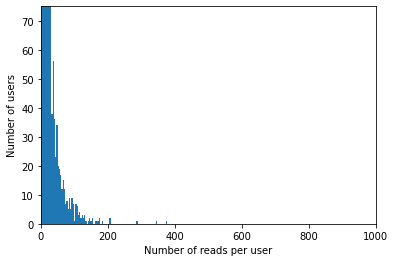

In [22]:
duplicate_counts_per_user = df['User_id'].value_counts()
plt.hist(duplicate_counts_per_user, bins = 100)
plt.ylim([0,75])
plt.xlim([0,1000])
plt.xlabel('Number of reads per user')
plt.ylabel("Number of users")
# print(duplicate_counts_per_value)